# SUPPLY CHAIN MANAGEMENT

Efficient supply chain management is vital for businesses aiming to optimize operations, reduce costs, and enhance customer satisfaction. In this project, we perform a comprehensive analysis of supply chain data, focusing on key metrics and processes to identify patterns, optimize inventory management, and improve overall performance.

The dataset includes critical columns such as:

Type: The type of order or transaction, helping categorize and analyze different types of operations.

Days for Shipping (Real): Actual shipping duration, essential for evaluating the efficiency and reliability of the logistics process.

Days for Shipment (Scheduled): Scheduled shipping duration, providing a benchmark to compare against actual shipping times.

Benefit per Order: Profitability of each order, crucial for assessing the financial health of the supply chain.

Sales per Customer: Customer purchase behavior, offering insights into demand patterns and customer segmentation.

Delivery Status: Status of each delivery, important for understanding the fulfillment success rate and identifying areas for improvement.

Late Delivery Risk: Indicator of potential delivery delays, enabling proactive measures to mitigate risks.

Category Id and Category Name: Product categorization, aiding in inventory management and demand forecasting.

Customer Details (City, Country, Email, Fname, Id, Lname, Password, Segment, State, Street, Zipcode): Comprehensive customer data, useful for segmentation, targeted marketing, and customer service improvement.

Department Id and Name: Departmental data, aiding in organizational performance analysis.

Latitude and Longitude: Geographical coordinates, useful for regional performance analysis and logistics planning.

Market: Market data, providing insights into different market segments and their performance.

Order Details (City, Country, Customer Id, Date, Id, Item Cardprod Id, Item Discount, Item Discount Rate, Item Id, Item Product Price, Item Profit Ratio, Item Quantity, Sales, Item Total, Profit Per Order, Region, State, Status, Zipcode): Detailed order data, essential for tracking order fulfillment, financial analysis, and identifying bottlenecks.

Product Details (Card Id, Category Id, Description, Image, Name, Price, Status): Product information, important for inventory tracking, product performance analysis, and data visualization.

Shipping Date (DateOrders) and Mode: Shipping details, critical for time series analysis and logistics optimization.

Importance of the Analysis
Total Sales Analysis: Performing total sales analysis in each region to identify high-performing areas and allocate resources efficiently.
    
Loss and Delivery Analysis: Identifying products with the most losses and late deliveries to address inefficiencies and improve product handling and delivery processes.
    
Fraud Detection: Detecting fraudulent transactions to prevent financial losses and enhance the security of the supply chain operations.
    
Inventory Management:
      Reorder Point Analysis: Determining optimal reorder points to ensure stock availability and minimize stockouts.
      Economic Order Quantity (EOQ): Calculating the optimal order quantity to minimize total inventory costs, including ordering and holding costs.
      Turnover Ratio: Analyzing inventory turnover ratio to understand how quickly inventory is being sold and replaced, aiding in inventory optimization.

Delivery Efficiency: Understanding the real versus scheduled shipping days and late delivery risks helps in identifying inefficiencies in the logistics process and improving delivery performance.

Profitability Analysis: Assessing benefit per order and sales per customer provides insights into the most profitable segments and customer behavior, aiding in strategic decision-making.

Customer Satisfaction: Analyzing delivery status and regional performance helps in identifying areas with frequent issues, enabling targeted improvements to enhance customer satisfaction.

Market Insights: Market Basket Analysis and product categorization offer valuable insights into product associations and customer preferences, driving cross-selling strategies and promotional campaigns.

Geographical Analysis: Utilizing geographical coordinates and regional data to optimize logistics, identify high-performing regions, and target specific markets.

This project aims to leverage data-driven insights to enhance supply chain efficiency, improve profitability, and deliver a superior customer experience. By integrating advanced analytics and visualization techniques, we can uncover hidden patterns and make informed decisions to drive business growth and operational excellence.








In [191]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.frequent_patterns import apriori   # ml extent importing apriori
from mlxtend.frequent_patterns import association_rules
from googletrans import Translator



from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [144]:
df=pd.read_csv(r"C:\Users\DELL\Documents\PGDA 36\projects\supply chain management\DataCoSupplyChainDataset.csv",encoding_errors='ignore')

In [3]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [5]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

categorical and numerical features

In [6]:
categorical_columns=df.select_dtypes(include='O')

In [7]:
categorical_columns

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,...,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,...,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,2/3/2018 22:56,Standard Class
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,...,Bikaner,India,1/13/2018 12:27,South Asia,Rajastn,PENDING,http://images.acmesports.sports/Smart+watch,Smart watch,1/18/2018 12:27,Standard Class
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,...,Bikaner,India,1/13/2018 12:06,South Asia,Rajastn,CLOSED,http://images.acmesports.sports/Smart+watch,Smart watch,1/17/2018 12:06,Standard Class
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,...,Townsville,Australia,1/13/2018 11:45,Oceania,Queensland,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,1/16/2018 11:45,Standard Class
4,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,...,Townsville,Australia,1/13/2018 11:24,Oceania,Queensland,PENDING_PAYMENT,http://images.acmesports.sports/Smart+watch,Smart watch,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Shipping on time,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,Peterson,XXXXXXXXX,Home Office,...,Shanghi,China,1/16/2016 3:40,Eastern Asia,Shanghi,CLOSED,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class
180515,DEBIT,Late delivery,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,Clark,XXXXXXXXX,Corporate,...,Hirakata,Japn,1/16/2016 1:34,Eastern Asia,Osaka,COMPLETE,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class
180516,TRANSFER,Late delivery,Fishing,Bristol,EE. UU.,XXXXXXXXX,John,Smith,XXXXXXXXX,Corporate,...,Adelaide,Australia,1/15/2016 21:00,Oceania,Australia del Sur,PENDING,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class
180517,PAYMENT,Advance shipping,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,...,Adelaide,Australia,1/15/2016 20:18,Oceania,Australia del Sur,PENDING_PAYMENT,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/18/2016 20:18,Standard Class


In [8]:
numeric_columns=df.select_dtypes(include='number')

In [9]:
numeric_columns

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,...,1,327.750000,314.640015,91.250000,NaN,1360,73,NaN,327.750000,0
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,...,1,327.750000,311.359985,-249.089996,NaN,1360,73,NaN,327.750000,0
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,...,1,327.750000,309.720001,-247.779999,NaN,1360,73,NaN,327.750000,0
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,...,1,327.750000,304.809998,22.860001,NaN,1360,73,NaN,327.750000,0
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,...,1,327.750000,298.250000,134.210007,NaN,1360,73,NaN,327.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,399.980011,0,45,1005,11207.0,7,40.640930,...,1,399.980011,399.980011,40.000000,NaN,1004,45,NaN,399.980011,0
180515,3,2,-613.770019,395.980011,1,45,9141,93304.0,7,35.362545,...,1,399.980011,395.980011,-613.770019,NaN,1004,45,NaN,399.980011,0
180516,5,4,141.110001,391.980011,1,45,291,6010.0,7,41.629959,...,1,399.980011,391.980011,141.110001,NaN,1004,45,NaN,399.980011,0
180517,3,4,186.229996,387.980011,0,45,2813,725.0,7,18.213350,...,1,399.980011,387.980011,186.229996,NaN,1004,45,NaN,399.980011,0


THERE ARE 24 CATEGORICAL AND 29 NUMERICAL COLUMNS IN MY DATA

### NULL VALUE CHECK

In [126]:
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Item Discount              0
Order Item Discount 

<Axes: >

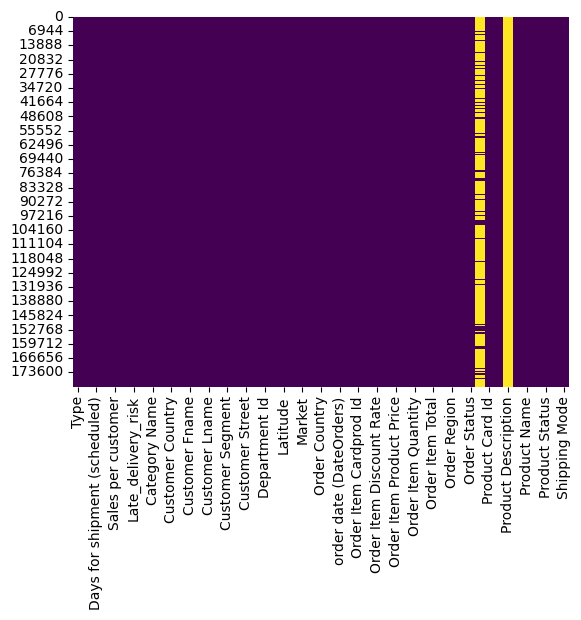

In [11]:
sns.heatmap(df.isnull(),cbar=False, cmap='viridis')

Customer Zipcode: 3 missing values.

Order Zipcode: 155,679 missing values; not critical due to other location features.

Product Description: All values are missing; drop the column.

Customer LName: 8 missing values; not significant since Customer Id is used.
All other columns have no missing values.

In [125]:
drop_columns=['Order Zipcode','Product Description']
df.drop(drop_columns,axis=1,inplace=True)

KeyError: "['Order Zipcode', 'Product Description'] not found in axis"

In [13]:
df.shape

(180519, 51)

UNIQUE VALUES IN CATEGORICAL COLUMN

In [14]:
cat_features=df.select_dtypes(include='O').columns.to_list()

In [15]:
cat_features

['Type',
 'Delivery Status',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Email',
 'Customer Fname',
 'Customer Lname',
 'Customer Password',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Department Name',
 'Market',
 'Order City',
 'Order Country',
 'order date (DateOrders)',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Image',
 'Product Name',
 'shipping date (DateOrders)',
 'Shipping Mode']

In [16]:
for i in cat_features:
    unique_values=df[i].unique()
    print(i)
    print(unique_values)

Type
['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']
Delivery Status
['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled']
Category Name
['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby ' 'Fishing' 'Books ' 'DVDs' 'CDs ' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel' "Women's Golf Clubs"
 "Men's Golf Clubs" 'Toys' 'Water Sports' 'Indoor/Outdoor Games']
Customer City
['Caguas' 'San Jose' 'Los Angeles' 'Tonawanda' 'Miami' 'San Ramon'
 'Freepor

Customer Password
['XXXXXXXXX']
Customer Segment
['Consumer' 'Home Office' 'Corporate']
Customer State
['PR' 'CA' 'NY' 'FL' 'MA' 'IL' 'MT' 'PA' 'MI' 'TX' 'DE' 'GA' 'MD' 'OH'
 'HI' 'NJ' 'WI' 'AZ' 'CO' 'MN' 'NC' 'NM' 'OR' 'SC' 'VA' 'UT' 'WA' 'KY'
 'WV' 'RI' 'CT' 'LA' 'TN' 'DC' 'ND' 'MO' 'IN' 'ID' 'NV' 'KS' 'AR' 'OK'
 'AL' 'IA' '95758' '91732']
Customer Street
['5365 Noble Nectar Island' '2679 Rustic Loop' '8510 Round Bear Gate' ...
 '245 Lost Way ' '2455 Merry Hollow ' '8621 Broad Forest ']
Department Name
['Fitness' 'Apparel' 'Golf' 'Footwear' 'Outdoors' 'Fan Shop' 'Technology'
 'Book Shop' 'Discs Shop' 'Pet Shop' 'Health and Beauty ']
Market
['Pacific Asia' 'USCA' 'Africa' 'Europe' 'LATAM']
Order City
['Bekasi' 'Bikaner' 'Townsville' ... 'Tongling' 'Liuyang' 'Nashua']
Order Country
['Indonesia' 'India' 'Australia' 'China' 'Japn' 'Corea del Sur' 'Singapur'
 'Turqua' 'Mongolia' 'Estados Unidos' 'Nigeria'
 'Repblica Democrtica del Congo' 'Senegal' 'Marruecos' 'Alemania'
 'Francia' 'Pases 

shipping date (DateOrders)
['2/3/2018 22:56' '1/18/2018 12:27' '1/17/2018 12:06' ... '1/25/2016 2:47'
 '1/23/2016 7:10' '1/21/2016 5:56']
Shipping Mode
['Standard Class' 'First Class' 'Second Class' 'Same Day']


In [127]:
df['Customer Full Name'] = df['Customer Fname'].astype(str)+df['Customer Lname'].astype(str)

df.drop("Customer Email",axis=1,inplace=True)
df.drop("Customer Fname",axis=1,inplace=True)
df.drop("Customer Lname",axis=1,inplace=True)
df.drop("Customer Password",axis=1,inplace=True)
df.drop("Product Image", axis=1,inplace=True)

In [18]:
df.shape

(180519, 47)

In [19]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,692.509764,31.851451,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,336.446807,15.640064,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,19.000000,2.000000,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,403.000000,18.000000,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,627.000000,29.000000,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,1004.000000,45.000000,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,1363.000000,76.000000,1999.989990,0.0


ANALYZING NUMERICAL FEATURES

In [20]:
numerical_features= df.select_dtypes(include='number').columns.to_list()

In [21]:
numerical_features

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Late_delivery_risk',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Latitude',
 'Longitude',
 'Order Customer Id',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Card Id',
 'Product Category Id',
 'Product Price',
 'Product Status']

CONVERING UNIQUE VALUES INTO CATEGORICAL 

In [97]:
df['Customer Id'] = df['Customer Id'].astype(str)
df['Category Id']=df['Category Id'].astype(str)
df['Customer Zipcode']=df['Customer Zipcode'].astype(str)
df['Order Customer Id']=df['Order Customer Id'].astype(str)
df['Order Id']=df['Order Id'].astype(str)
df['Order Item Id']=df['Order Item Id'].astype(str)
df['Product Card Id']=df['Product Card Id'].astype(str)
df['Product Category Id']=df['Product Category Id'].astype(str)
df['Order Item Cardprod Id']=df['Order Item Cardprod Id'].astype(str)

In [23]:
df['Product Status'].value_counts()

Product Status
0    180519
Name: count, dtype: int64

numerical_feature=Days for shipping (real)


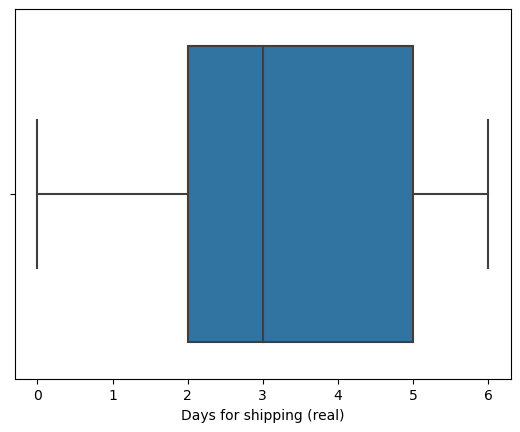

count    180519.000000
mean          3.497654
std           1.623722
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Days for shipping (real), dtype: float64

numerical_feature=Days for shipment (scheduled)


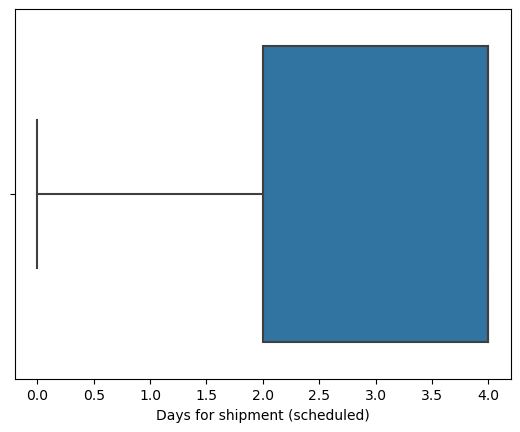

count    180519.000000
mean          2.931847
std           1.374449
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: Days for shipment (scheduled), dtype: float64

numerical_feature=Benefit per order


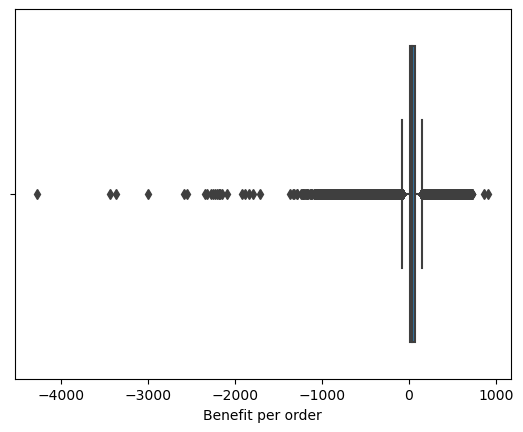

count    180519.000000
mean         21.974989
std         104.433526
min       -4274.979980
25%           7.000000
50%          31.520000
75%          64.800003
max         911.799988
Name: Benefit per order, dtype: float64

numerical_feature=Sales per customer


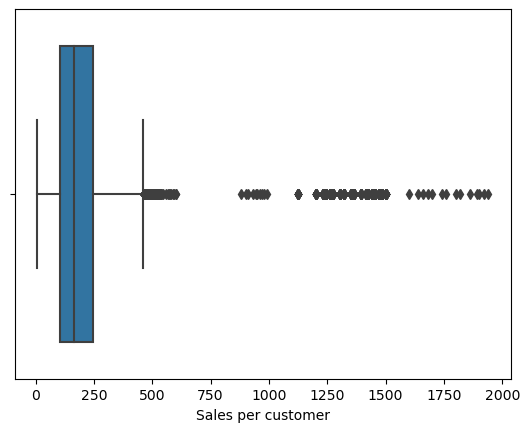

count    180519.000000
mean        183.107609
std         120.043670
min           7.490000
25%         104.379997
50%         163.990005
75%         247.399994
max        1939.989990
Name: Sales per customer, dtype: float64

numerical_feature=Late_delivery_risk


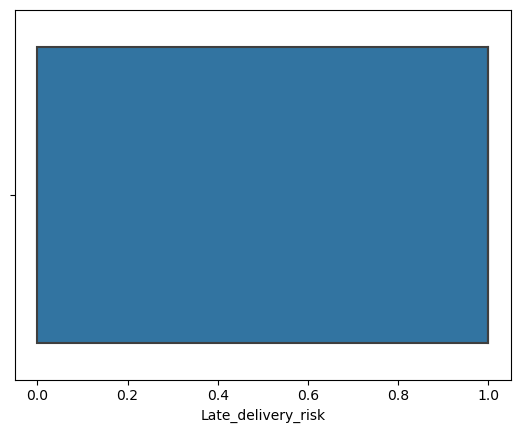

count    180519.000000
mean          0.548291
std           0.497664
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Late_delivery_risk, dtype: float64

numerical_feature=Category Id


TypeError: Horizontal orientation requires numeric `x` variable.

In [24]:
for i in numerical_features:
    print(f'numerical_feature={i}')
    sns.boxplot(x=df[i])
    plt.show()
    display(df[i].describe())
    
    

In [25]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Department Id,Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,5.443460,29.719955,-84.915675,20.664741,0.101668,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,1.629246,9.813646,21.433241,21.800901,0.070415,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,-33.937553,-158.025986,0.000000,0.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,4.000000,18.265432,-98.446312,5.400000,0.040000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,5.000000,33.144863,-76.847908,14.000000,0.100000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,7.000000,39.279617,-66.370583,29.990000,0.160000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,12.000000,48.781933,115.263077,500.000000,0.250000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,1999.989990,0.0


Days for shipping (real): Actual shipping times average 3.5 days, with outliers reaching up to 6 days.

Days for shipment (scheduled): Scheduled shipping times average 2.93 days, with a few orders scheduled up to 4 days.

Benefit per order: Average profit per order is $21.97, with significant outliers ranging from -$4274.98 to $911.80.

Sales per customer: Customers spend an average of $183.11 per order, with high outliers up to $1939.99.

Late delivery risk: About 55 \% of orders are at risk of late delivery, with some orders not at risk at all.

Department Id: Department IDs average around 5.44, ranging from 2 to 12.


Order Item Discount: Discounts per item average $20.66, with significant outliers up to $500.

Order Item Discount Rate: Discount rates average 10.17 \%, with maximum rates of 25%.

Order Item Product Price: Product prices average $141.23, with high outliers up to $1999.99.

Order Item Profit Ratio: Profit ratios average 12.06 \%, with extreme values from -275% to 50%.

Order Item Quantity: Average quantity per order is 2.13 items, with some orders containing up to 5 items.

Sales: Sales per order average $203.77, with outliers up to $1999.99.

Order Item Total: Total amount per order averages $183.11, with high outliers up to $1939.99.

Order Profit Per Order: Profit per order averages $21.97, with substantial outliers from -$4274.98 to $911.80.

Product Price: Product prices average $141.23, with significant outliers reaching $1999.99.

Product Status: All products in the dataset have a status of 0, indicating a uniform status across products.

## converting date columns to date time objects

In [117]:
df['order date (DateOrders)']= pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)']=pd.to_datetime(df['shipping date (DateOrders)'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  object        
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

# Data visualization

## category vs sales

In [141]:
category_sales=df.groupby('Category Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(14)
plt.figure(figsize=(10, 6))
import plotly.express as px


fig = px.bar(category_sales, x='Category Name', y='Sales', title='Aggregate Sales by Category')

fig.show()


<Figure size 1000x600 with 0 Axes>

we can see that fishing has the highest sales of fishing

In [139]:
category_sales

,Category Name,Sales
7,CDs,3.059590e+03
43,Toys,6.104660e+03
23,Golf Bags & Carts,1.036939e+04
2,Baby,1.222956e+04
5,Books,1.258740e+04
1,As Seen on TV!,2.059794e+04
39,Soccer,2.647705e+04
4,Basketball,2.709933e+04
45,Video Games,3.331050e+04
22,Golf Apparel,3.496975e+04


In [30]:
Category_Name=df.groupby(['Category Name'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(Category_Name, y='Number of Orders',x = 'Category Name',color ='Number of Orders')


C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [31]:
geographical = df.groupby(['Order Country', 'Order City'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by='Profit of Orders', ascending=False)
print(geographical.head())

geographical_with_coords = geographical.merge(
    df[['Order Country', 'Order City', 'Latitude', 'Longitude']].drop_duplicates(),
    on=['Order Country', 'Order City'],
    how='left'  # Use a left join to keep all rows from the geographical DataFrame
)

print(geographical_with_coords.head())
geographical_with_coords_unique = geographical_with_coords.drop_duplicates(
    subset=['Order Country', 'Order City'],keep='first'  # Keep the first occurrence of each unique pair
)

print(geographical_with_coords_unique.head())

fig = px.choropleth(
    geographical, 
    locationmode='country names',
    locations='Order Country',
    color='Profit of Orders',
    hover_name='Order Country',
    color_continuous_scale=px.colors.sequential.YlOrRd
)

highlight_points = geographical_with_coords_unique.loc[
    ((geographical_with_coords_unique['Order Country'].str.lower() == 'repblica dominicana'.lower()) &
    (geographical_with_coords_unique['Order City'].str.lower() == 'santo domingo'.lower())) | 
    ((geographical_with_coords_unique['Order Country'].str.lower() == 'estados unidos'.lower()) &(geographical_with_coords_unique['Order City'].str.lower() == 'new york city'.lower()))
]

print(highlight_points)

highlight_scatter = px.scatter_geo(
    highlight_points,
    lat='Latitude',
    lon='Longitude',
    text='Profit of Orders',
    size='Profit of Orders',
    size_max=10,
    color_discrete_sequence=['red']
)
# Add the scatter plot to the choropleth map
fig.add_trace(highlight_scatter.data[0])

# Show the combined plot
fig.show()

            Order Country     Order City  Profit of Orders
3260  Repblica Dominicana  Santo Domingo      51111.670019
1492       Estados Unidos  New York City      47889.759868
2152             Honduras    Tegucigalpa      40973.640056
1431       Estados Unidos    Los Angeles      38014.360024
2841            Nicaragua        Managua      34319.950107
         Order Country     Order City  Profit of Orders   Latitude  Longitude
0  Repblica Dominicana  Santo Domingo      51111.670019  18.291080 -66.370506
1  Repblica Dominicana  Santo Domingo      51111.670019  18.256718 -66.370628
2  Repblica Dominicana  Santo Domingo      51111.670019  18.247389 -66.370575
3  Repblica Dominicana  Santo Domingo      51111.670019  40.640594 -73.975189
4  Repblica Dominicana  Santo Domingo      51111.670019  18.265968 -66.370636
            Order Country     Order City  Profit of Orders   Latitude  \
0     Repblica Dominicana  Santo Domingo      51111.670019  18.291080   
694        Estados Unidos  New Y

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [32]:
market = df.groupby('Market')
region = df.groupby('Order Region')

fig1 = px.bar(
    market['Sales per customer'].sum().sort_values(ascending=False).reset_index(),
    x='Market',
    y='Sales per customer',
    title="Total sales for all markets",
    labels={'Sales per customer': 'Total Sales'},
    width=800,
    height=600
)
fig1.show()

region_sales_per_customer = region['Sales per customer'].sum().sort_values(ascending=False).reset_index()


C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [33]:
region_sales_per_customer = region['Sales per customer'].sum().sort_values(ascending=False).reset_index()
fig2 = px.bar(
    region_sales_per_customer,
    x='Order Region',
    y='Sales per customer',
    title="Total sales for all regions",
    labels={'Sales per customer': 'Total Sales'},
    width=800,
    height=600
)
fig2.show()

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



## profit analysis

In [145]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [146]:
df['Order Profit Per Order'].value_counts()

Order Profit Per Order
 0.000000      1177
 143.990005     199
 72.000000      194
 46.799999      188
 24.000000      181
               ... 
-48.830002        1
 48.220001        1
-145.729996       1
-330.109985       1
-337.100006       1
Name: count, Length: 21998, dtype: int64

In [149]:
df['profit_or_loss']=df['Order Profit Per Order'].apply(lambda x:'profit' if x>0 else 'loss')

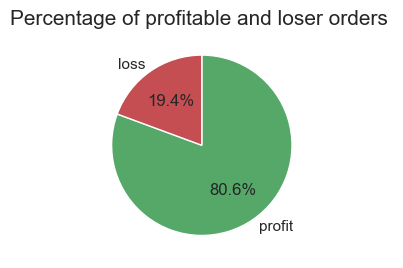

In [151]:
plt.subplot(1, 2, 2)
pie_data = df["profit_or_loss"].value_counts()
plt.pie(pie_data,labels = pie_data.index, startangle = 90, counterclock = False , autopct='%.1f%%',colors= ["g", "r"])
plt.title("Percentage of profitable and loser orders ",size = 15);

In [160]:
dep_profit_ratio = df.groupby("Department Name")['Order Item Profit Ratio'].mean().sort_values().rename("Average Profit Ratio").reset_index()
dep_profit_ratio

,Department Name,Average Profit Ratio
0,Book Shop,0.079062
1,Pet Shop,0.094106
2,Health and Beauty,0.095580
3,Discs Shop,0.109664
4,Golf,0.118773
5,Footwear,0.119187
6,Fan Shop,0.120016
7,Apparel,0.122755
8,Outdoors,0.125773
9,Technology,0.125809


In [161]:
fig3 = px.bar(
    dep_profit_ratio,
    x='Department Name',
    y='Average Profit Ratio',
    title="profit ratio per department",
    labels={'Order Item Profit Ratio':' Order Item Profit Ratio'},
    width=800,
    height=600
)
fig3.show()


In [163]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [167]:
bottom_25_products_profit_ratio = df.groupby("Product Name")['Order Item Profit Ratio'].mean().sort_values().head(30).rename('Order Item Profit Ratio').reset_index()
bottom_25_products_profit_ratio

,Product Name,Order Item Profit Ratio
0,SOLE E25 Elliptical,-0.036000
1,SOLE E35 Elliptical,-0.030000
2,Bushnell Pro X7 Jolt Slope Rangefinder,-0.024545
3,GoPro HERO3+ Black Edition Camera,0.015000
4,Diamondback Girls' Clarity 24 Hybrid Bike 201,0.037857
5,Garmin Forerunner 910XT GPS Watch,0.038571
6,Stiga Master Series ST3100 Competition Indoor,0.049259
7,Cleveland Golf Women's 588 RTX CB Satin Chrom,0.052143
8,Men's gala suit,0.052981
9,Polar Loop Activity Tracker,0.060000


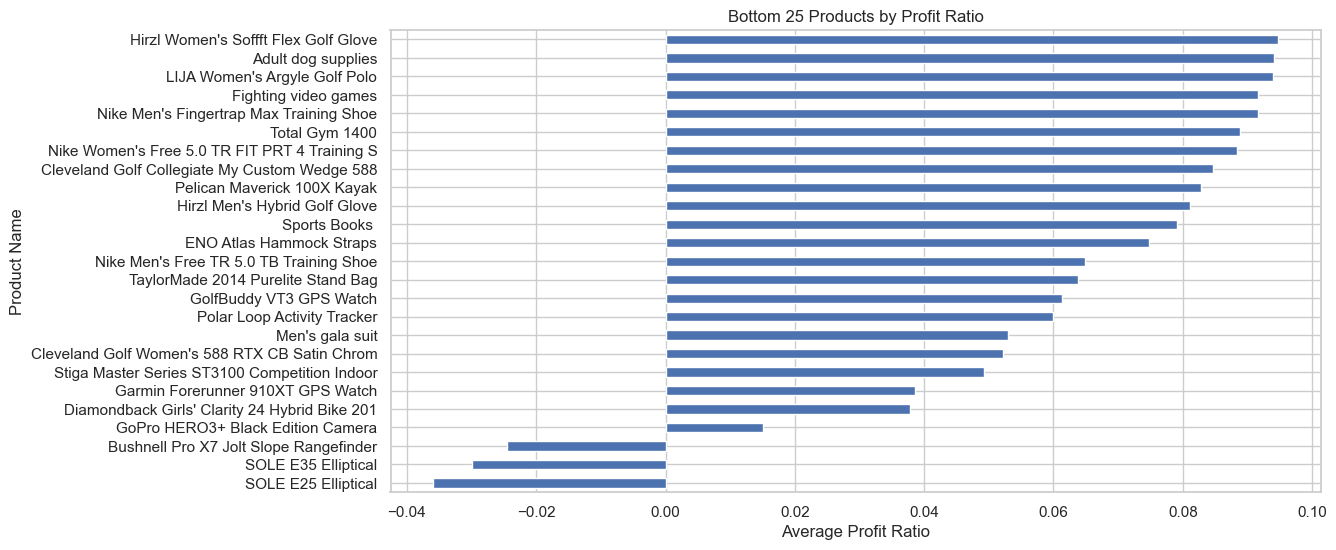

In [173]:
bottom_25_products_profit_ratio = df.groupby("Product Name")['Order Item Profit Ratio'].mean().sort_values().head(25)

# Plotting using matplotlib (vertical bar plot)
plt.figure(figsize=(12, 6))
bottom_25_products_profit_ratio.plot(kind='barh')
plt.title('Bottom 25 Products by Profit Ratio')
plt.xlabel('Average Profit Ratio')
plt.ylabel('Product Name')
plt.show()

3 products are having loss

In [178]:
top_25_products_profit_ratio = df.groupby("Product Name")['Order Item Profit Ratio'].mean().sort_values().tail(30).rename('Order Item Profit Ratio').reset_index()
top_25_products_profit_ratio

,Product Name,Order Item Profit Ratio
0,Nike Women's Legend V-Neck T-Shirt,0.139928
1,Titleist Club Glove Travel Cover,0.140000
2,adidas Men's F10 Messi TRX FG Soccer Cleat,0.140000
3,Under Armour Women's Ignite Slide,0.141929
4,Merrell Women's Siren Mid Waterproof Hiking B,0.142429
5,Lawn mower,0.142521
6,Rock music,0.142650
7,Team Golf Texas Longhorns Putter Grip,0.145719
8,Titleist Pro V1x High Numbers Personalized Go,0.147614
9,Under Armour Hustle Storm Medium Duffle Bag,0.148495


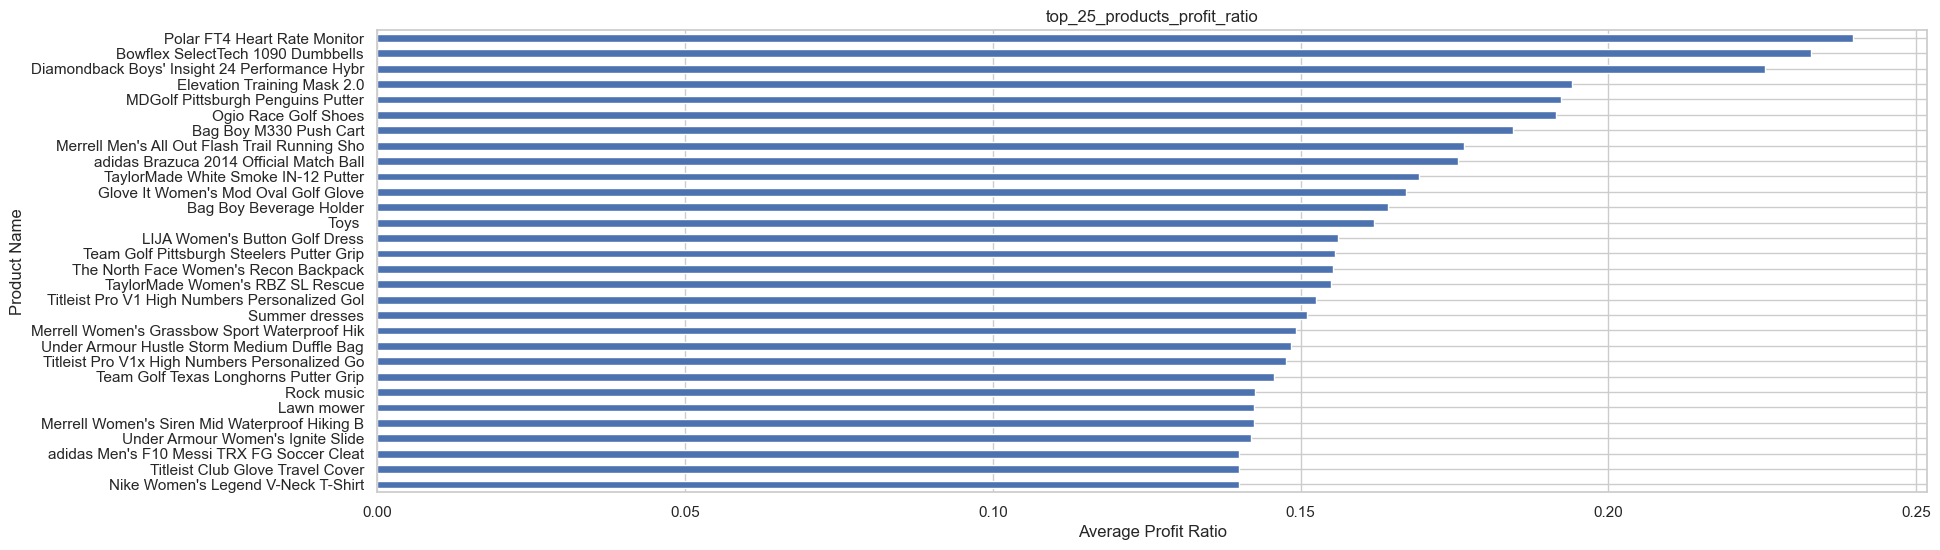

In [179]:
top_25_products_profit_ratio = df.groupby("Product Name")['Order Item Profit Ratio'].mean().sort_values().tail(30)
top_25_products_profit_ratio
plt.figure(figsize=(20, 6))
top_25_products_profit_ratio.plot(kind='barh')
plt.title('top_25_products_profit_ratio')
plt.xlabel('Average Profit Ratio')
plt.ylabel('Product Name')
plt.show()

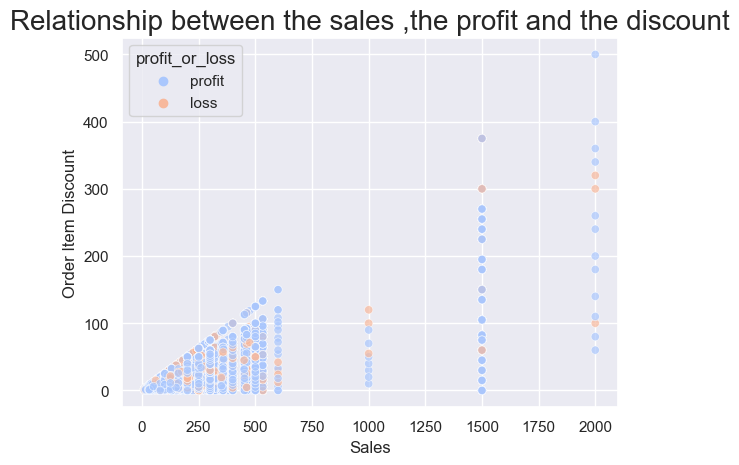

In [181]:
sns.set(style="darkgrid")
sns.scatterplot( x= df.Sales , y = df['Order Item Discount'], palette = "coolwarm",
               hue = df["profit_or_loss"],alpha= .7 )
plt.title("Relationship between the sales ,the profit and the discount",size = 20);

BUILDING A MAP TO ANALYZE THE PROFIT ACROSS THE WORLD

In [185]:
df_map = df.groupby("Order Country")['Order Profit Per Order'].sum().sort_values().reset_index()
df_map

,Order Country,Order Profit Per Order
0,Guinea-Bissau,-1448.720008
1,Taiwn,-1374.540018
2,Ruanda,-330.020066
3,Bosnia y Herzegovina,-327.380032
4,Mongolia,-286.229951
...,...,...
159,Brasil,186713.640355
160,Alemania,194827.080381
161,Mxico,303278.370637
162,Francia,327828.580099


In [193]:
translator = Translator()
df_map["translated_Order_Country"] = df_map['Order Country'].apply(lambda x : translator.translate(x, dest='en').text )

TypeError: the JSON object must be str, bytes or bytearray, not NoneType

In [194]:
translator = Translator()

# Define a function to translate text
def translate_text(text):
    try:
        if text is not None:
            translated = translator.translate(text, dest='en')
            return translated.text
        else:
            return None
    except Exception as e:
        print(f"Error translating text '{text}': {e}")
        return None

# Apply the translation function to the 'Order Country' column
df_map["translated_Order_Country"] = df_map['Order Country'].apply(translate_text)

# Display the DataFrame with the new column
print(df_map[['Order Country', 'translated_Order_Country']].head())

Error translating text 'Trinidad y Tobago': the JSON object must be str, bytes or bytearray, not NoneType
          Order Country translated_Order_Country
0         Guinea-Bissau            Guinea-Bissau
1                 Taiwn                    Taean
2                Ruanda                   Rwanda
3  Bosnia y Herzegovina   Bosnia and Herzegovina
4              Mongolia                 Mongolia


In [206]:
df_map

,Order Country,Order Profit Per Order,translated_Order_Country
0,Guinea-Bissau,-1448.720008,Guinea-Bissau
1,Taiwn,-1374.540018,Taean
2,Ruanda,-330.020066,Rwanda
3,Bosnia y Herzegovina,-327.380032,Bosnia and Herzegovina
4,Mongolia,-286.229951,Mongolia
...,...,...,...
159,Brasil,186713.640355,Brazil
160,Alemania,194827.080381,Germany
161,Mxico,303278.370637,Mexico
162,Francia,327828.580099,France


In [196]:
def country_name_changer(name,newname):
    df_map["translated_Order_Country"]  = df_map["translated_Order_Country"].replace(name,newname)

In [197]:
country_name_changer(["Bosnia y Herzegovina","Republic of Gambia","Belice","Occidental Sahara","Surinam","Butane","Republic of Congo","Sierra Leona","Botsana","Guadalupe","Moldavia","Swiss","Myanmar (Burmania)","Rumania","Irak","Democratic Republic of Congo","Filipinas","Türkiye","The Savior","Italia","Y i don’t mention","French Guayana","Barine","Tayikistan","CHIPP","Lesoto","Botana","Y i not mentioned","Kyrguistan","Finlandia","Myanmar (Birmania)","Space"],
                     ["Bosnia and Herzegovina","Gambia","Belize","Western Sahara","Suriname","Bhutan","Congo","Sierra Leone","Botswana","Guadeloupe","Moldova","Switzerland","Myanmar","Romania","Iraq","Congo","Philippines","Turkey","El Salvador","Italy","Djibouti","French Guiana","Bahrain","Tajikistan","Chile","Lesotho","Bhutan","Dominica","Kyrgyzstan","Finland","Myanmar","Switzerland"])

In [211]:
def get_country_iso3(name):
    if name:
        try:
            country = pycountry.countries.search_fuzzy(name)
            return country[0].alpha_3 if country else None
        except LookupError:
            return None
    else:
        return None

# Apply the function to create a new column with ISO3 country codes
df_map["order_country_iso3"] = df_map['translated_Order_Country'].apply(lambda x: get_country_iso3(x))

In [212]:
fig = px.choropleth(df_map, locations='order_country_iso3', color='Order Profit Per Order',
                    hover_name='translated_Order_Country',projection='natural earth', title='Interactive mape of The total profit per country',
                   color_continuous_scale="magma_r")

fig.show()

In [35]:
import plotly.express as px
loss = df[df['Benefit per order'] < 0]
loss_by_category = loss['Category Name'].value_counts().nlargest(10).reset_index()
loss_by_category.columns = ['Category Name', 'Count']
fig1 = px.bar(
    loss_by_category,
    x='Category Name',
    y='Count',
    title='Products with Most Loss',
    labels={'Category Name': 'Product Category', 'Count': 'Count'},
    
    width=800,
    height=600
)
fig1.show()

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [36]:
loss_by_category

,Category Name,Count
0,Cleats,4590
1,Men's Footwear,4169
2,Women's Apparel,3923
3,Indoor/Outdoor Games,3617
4,Fishing,3209
5,Water Sports,2924
6,Camping & Hiking,2590
7,Cardio Equipment,2332
8,Shop By Sport,2154
9,Electronics,562


In [37]:
loss_by_region = loss['Order Region'].value_counts().nlargest(10).reset_index()
loss_by_region.columns = ['Order Region', 'Count']
fig2 = px.bar(
    loss_by_region,
    x='Order Region',
    y='Count',
    title='Regions with Most Loss',
    labels={'Order Region': 'Region', 'Count': 'Count'},
    
    width=800,
    height=600
)

fig2.show()

total_loss = loss['Benefit per order'].sum()
print("Total loss: ", total_loss)


C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Total loss:  -3883547.345768667


# Risk managment delivery

In [38]:
late_delivery_data = df[df['Delivery Status'] == 'Late delivery']
late_by_CATEGORY = late_delivery_data['Category Name'].value_counts().nlargest(10).reset_index()
late_by_CATEGORY.columns = ['CATEGORY NAME', 'Late Deliveries']
fig = px.bar(
    late_by_CATEGORY,
    x='CATEGORY NAME',
    y='Late Deliveries',
    title='Top 10 CATEGORY with Late Deliveries',
    labels={'Product Name': 'Product', 'Late Deliveries': 'Late Delivery Count'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show()

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



PRODUCTS WHICH ARE LATE IN DELIVERIES

In [39]:
late_delivery_data = df[df['Delivery Status'] == 'Late delivery']
late_by_product = late_delivery_data['Product Name'].value_counts().nlargest(10).reset_index()
late_by_product.columns = ['Product Name', 'Late Deliveries']
fig = px.bar(
    late_by_product,
    x='Product Name',
    y='Late Deliveries',
    title='Top 10 Products with Late Deliveries',
    labels={'Product Name': 'Product', 'Late Deliveries': 'Late Delivery Count'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show()

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [40]:
df['Order Status'].value_counts()

Order Status
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: count, dtype: int64

In [43]:
df['Order Country'].value_counts()

Order Country
Estados Unidos       24840
Francia              13222
Mxico                13172
Alemania              9564
Australia             8497
                     ...  
Guinea Ecuatorial        2
Kuwait                   2
Shara Occidental         2
Burundi                  1
Serbia                   1
Name: count, Length: 164, dtype: int64

In [41]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'Order Customer Id', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode', 'Customer Fu

In [44]:
df['Product Status'].value_counts()

Product Status
0    180519
Name: count, dtype: int64

we can see that all the products have been delivered and the losses were mainly due to late deliveries. now lets dig deeper into late deliveries vs shipments

In [45]:
late_by_region_shipment = late_delivery_data.groupby(['Order Region', 'Shipping Mode']).size().reset_index(name='Late Deliveries')
late_by_region_shipment = late_by_region_shipment.sort_values(by='Late Deliveries', ascending=False)
# Plotting the late deliveries by region and shipment type using Plotly Express bar plot
fig = px.bar(
    late_by_region_shipment,
    x='Order Region',
    y='Late Deliveries',
    color='Shipping Mode',
    barmode='group',
    title='Late Deliveries by Region and Shipment Type',
    labels={'Order Region': 'Region', 'Late Deliveries': 'Late Delivery Count'},
    template='plotly_dark',

)
# Show the plot
fig.show()

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



1. First Class
Speed: Fast delivery service, usually within a few days.
Cost: Higher than Second Class due to faster delivery times and often better service.
Use Case: Suitable for urgent shipments that need to arrive quickly but don’t require immediate delivery. Often used for smaller, lighter packages.
2. Second Class
Speed: Slower than First Class, typically taking several days to a week.
Cost: Lower than First Class, making it more cost-effective for less urgent deliveries.
Use Case: Ideal for non-urgent shipments where cost is a concern. Often used for larger or heavier packages that don’t need expedited shipping.
3. Same Day
Speed: Fastest delivery service, ensuring that the package arrives on the same day it was sent.
Cost: Usually the highest due to the urgency and resources required to ensure same-day delivery.
Use Case: Critical for extremely urgent deliveries that must reach the recipient within hours. Often used for important documents, emergency supplies, or high-priority items.

Short-Term Actions

Expedited Shipping for Key Items: For critical shipments, consider upgrading to First Class or Same Day shipping temporarily until improvements are made.

Buffer Time: Add a buffer time in the delivery estimates to account for potential delays and improve accuracy.

Long-Term Actions
Infrastructure Investments: Invest in logistics infrastructure improvements in Central America to enhance the overall efficiency of the supply chain.

Partnership with Local Carriers: Form partnerships with local carriers who have a better understanding of the regional delivery landscape and can navigate it more effectively.

In all the regions we can see the late deliveries caused due to first class and second class shipping is same. 

In [46]:
late_by_region_shipment.head(50)

,Order Region,Shipping Mode,Late Deliveries
15,Central America,Standard Class,6571
91,Western Europe,Standard Class,6089
90,Western Europe,Second Class,4236
12,Central America,First Class,4185
14,Central America,Second Class,4111
88,Western Europe,First Class,4107
51,South America,Standard Class,3437
47,Oceania,Standard Class,2387
63,Southeast Asia,Standard Class,2236
43,Northern Europe,Standard Class,2236


In [74]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name',
       'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id',
       'Order Item Discount', 'Order Item Id', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Profit Per Order',
       'Order Region', 'Order State', 'Order Status', 'Product Card Id',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode',
       'Customer Full Name'],
      dtype='object')

In [76]:
df['Delivery Status'].value_counts().index

Index(['Late delivery', 'Advance shipping', 'Shipping on time',
       'Shipping canceled'],
      dtype='object', name='Delivery Status')

Text(0, 0.5, 'Count')

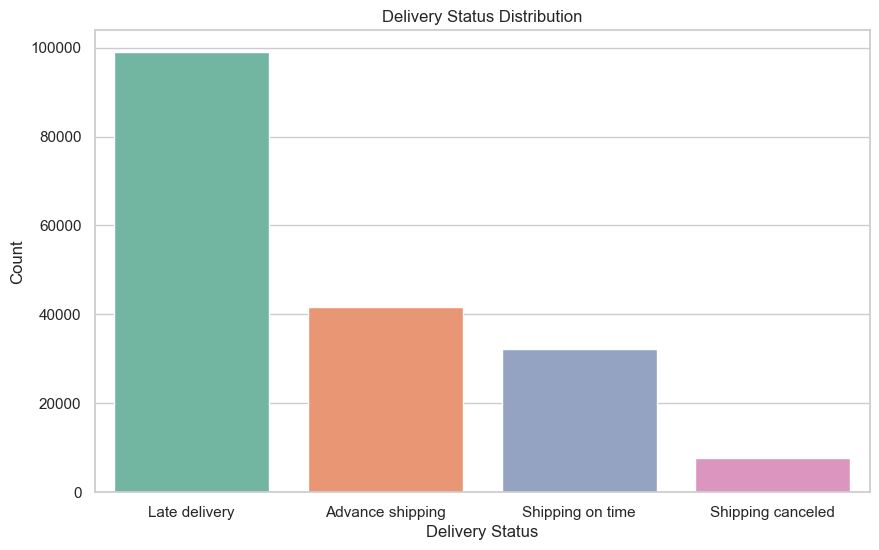

In [79]:
# Visualization
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data=df, x='Delivery Status', order=df['Delivery Status'].value_counts().index,palette='Set2')
plt.title('Delivery Status Distribution')
plt.xlabel('Delivery Status')
plt.ylabel('Count')


In [81]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name',
       'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id',
       'Order Item Discount', 'Order Item Id', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Profit Per Order',
       'Order Region', 'Order State', 'Order Status', 'Product Card Id',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode',
       'Customer Full Name'],
      dtype='object')

Cross-Tabulation (Contingency Table) with Percentages:
Delivery Status  Advance shipping  Late delivery  Shipping canceled  \
Shipping Mode                                                         
First Class              0.000000      95.322499           4.677501   
Same Day                 0.000000      45.743042           4.559926   
Second Class             0.000000      76.632781           4.003862   
Standard Class          38.599748      38.071683           4.268134   

Delivery Status  Shipping on time  
Shipping Mode                      
First Class              0.000000  
Same Day                49.697032  
Second Class            19.363358  
Standard Class          19.060435  


<Figure size 1200x800 with 0 Axes>

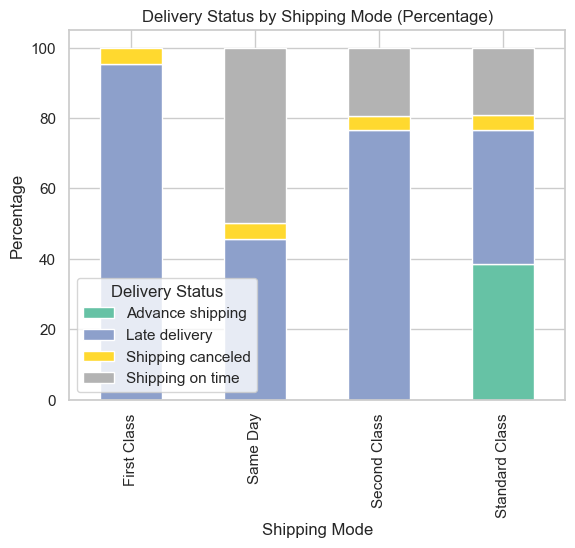

In [82]:
delivery_status_data = df['Delivery Status']
shipping_mode_data = df['Shipping Mode']

# Create a cross-tabulation (contingency table) to analyze the relationship
cross_tab = pd.crosstab(shipping_mode_data, delivery_status_data)

# Calculate row percentages
cross_tab_percent = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Visualize the cross-tabulation as a stacked bar chart with percentages
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
cross_tab_percent.plot(kind="bar", stacked=True, colormap='Set2')
plt.title('Delivery Status by Shipping Mode (Percentage)')
plt.xlabel('Shipping Mode')
plt.ylabel('Percentage')

# Display the cross-tabulation with percentages
print("Cross-Tabulation (Contingency Table) with Percentages:")
print(cross_tab_percent)

In [84]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name',
       'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id',
       'Order Item Discount', 'Order Item Id', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Profit Per Order',
       'Order Region', 'Order State', 'Order Status', 'Product Card Id',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode',
       'Customer Full Name'],
      dtype='object')

In [100]:
df['Late_delivery_risk'].value_counts()

Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

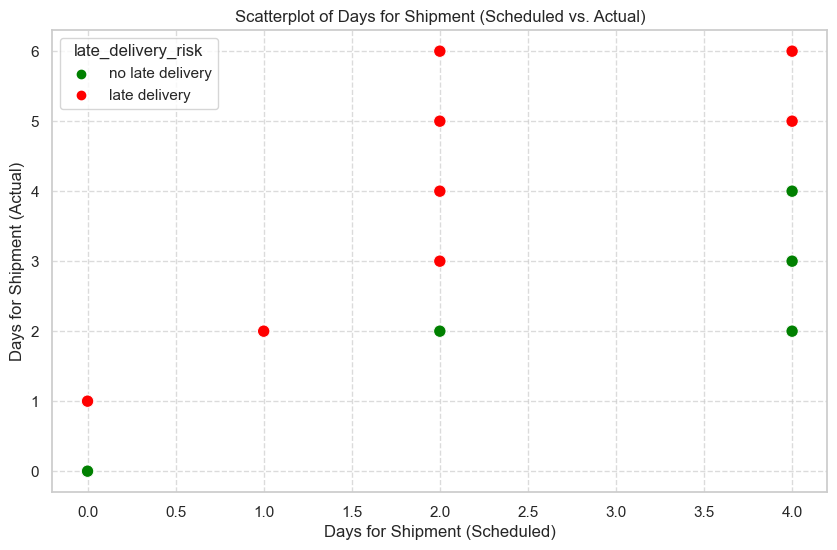

In [103]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
df['late_delivery_risk'] = df['Late_delivery_risk'].map({0: 'no late delivery', 1: 'late delivery'})

palette = {'no late delivery': 'green', 'late delivery': 'red'}

scatter = sns.scatterplot(x="Days for shipment (scheduled)", y="Days for shipping (real)", hue="late_delivery_risk", data=df, palette=palette, s=80)
plt.title('Scatterplot of Days for Shipment (Scheduled vs. Actual)')
plt.xlabel('Days for Shipment (Scheduled)')
plt.ylabel('Days for Shipment (Actual)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


According to the chart, the orders that were scheduled to be delivered in 2 days have the highest delay. By analyzing the dataset, 2-day deliveries are related to second-class shipping modes. As a result, the highest amount of delay in delivery is related to the Second Class. Shipping Modes (Days for shipment scheduled):

Standard Class (4 Days) Second Class (2 Days) First Class (1 Day) Same Day (0 Day)

In [ ]:
df.columns

In [ ]:
df.Type.value_counts()

## Fraud detection

In [47]:
data=df[(df['Type'] != 'TRANSFER')&(df['Order Status'] == 'SUSPECTED_FRAUD')]
data['Order Region'].value_counts()

Series([], Name: count, dtype: int64)

we can see that all the fraudulent transactions has happened in case of transfer type transactions

In [48]:
fraud_data = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')]

fraud_by_region = fraud_data['Order Region'].value_counts().reset_index()

fraud_by_region.columns = ['Order Region', 'Count']

fraud_by_region = fraud_by_region.sort_values(by='Count', ascending=False)

fig = px.bar(
    fraud_by_region,
    x='Order Region',
    y='Count',
    title='Regions with Highest Fraud',
    labels={'Order Region': 'Region', 'Count': 'Fraud Count'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show()

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [49]:
suspected_fraud_data = df[df['Order Status'] == 'SUSPECTED_FRAUD']
fraud_by_customer = suspected_fraud_data['Customer Full Name'].value_counts().nlargest(10).reset_index()
fraud_by_customer.columns = ['Customer Full Name', 'Fraud Count']
fig = px.bar(
    fraud_by_customer,
    x='Customer Full Name',
    y='Fraud Count',
    title='Top 10 Customers Causing Fraud',
    labels={'Customer Full Name': 'Customer', 'Fraud Count': 'Fraud Count'},
    template='plotly_dark',
    width=800,
    height=600
)
fig.show()

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\DELL\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Numeric value corelation

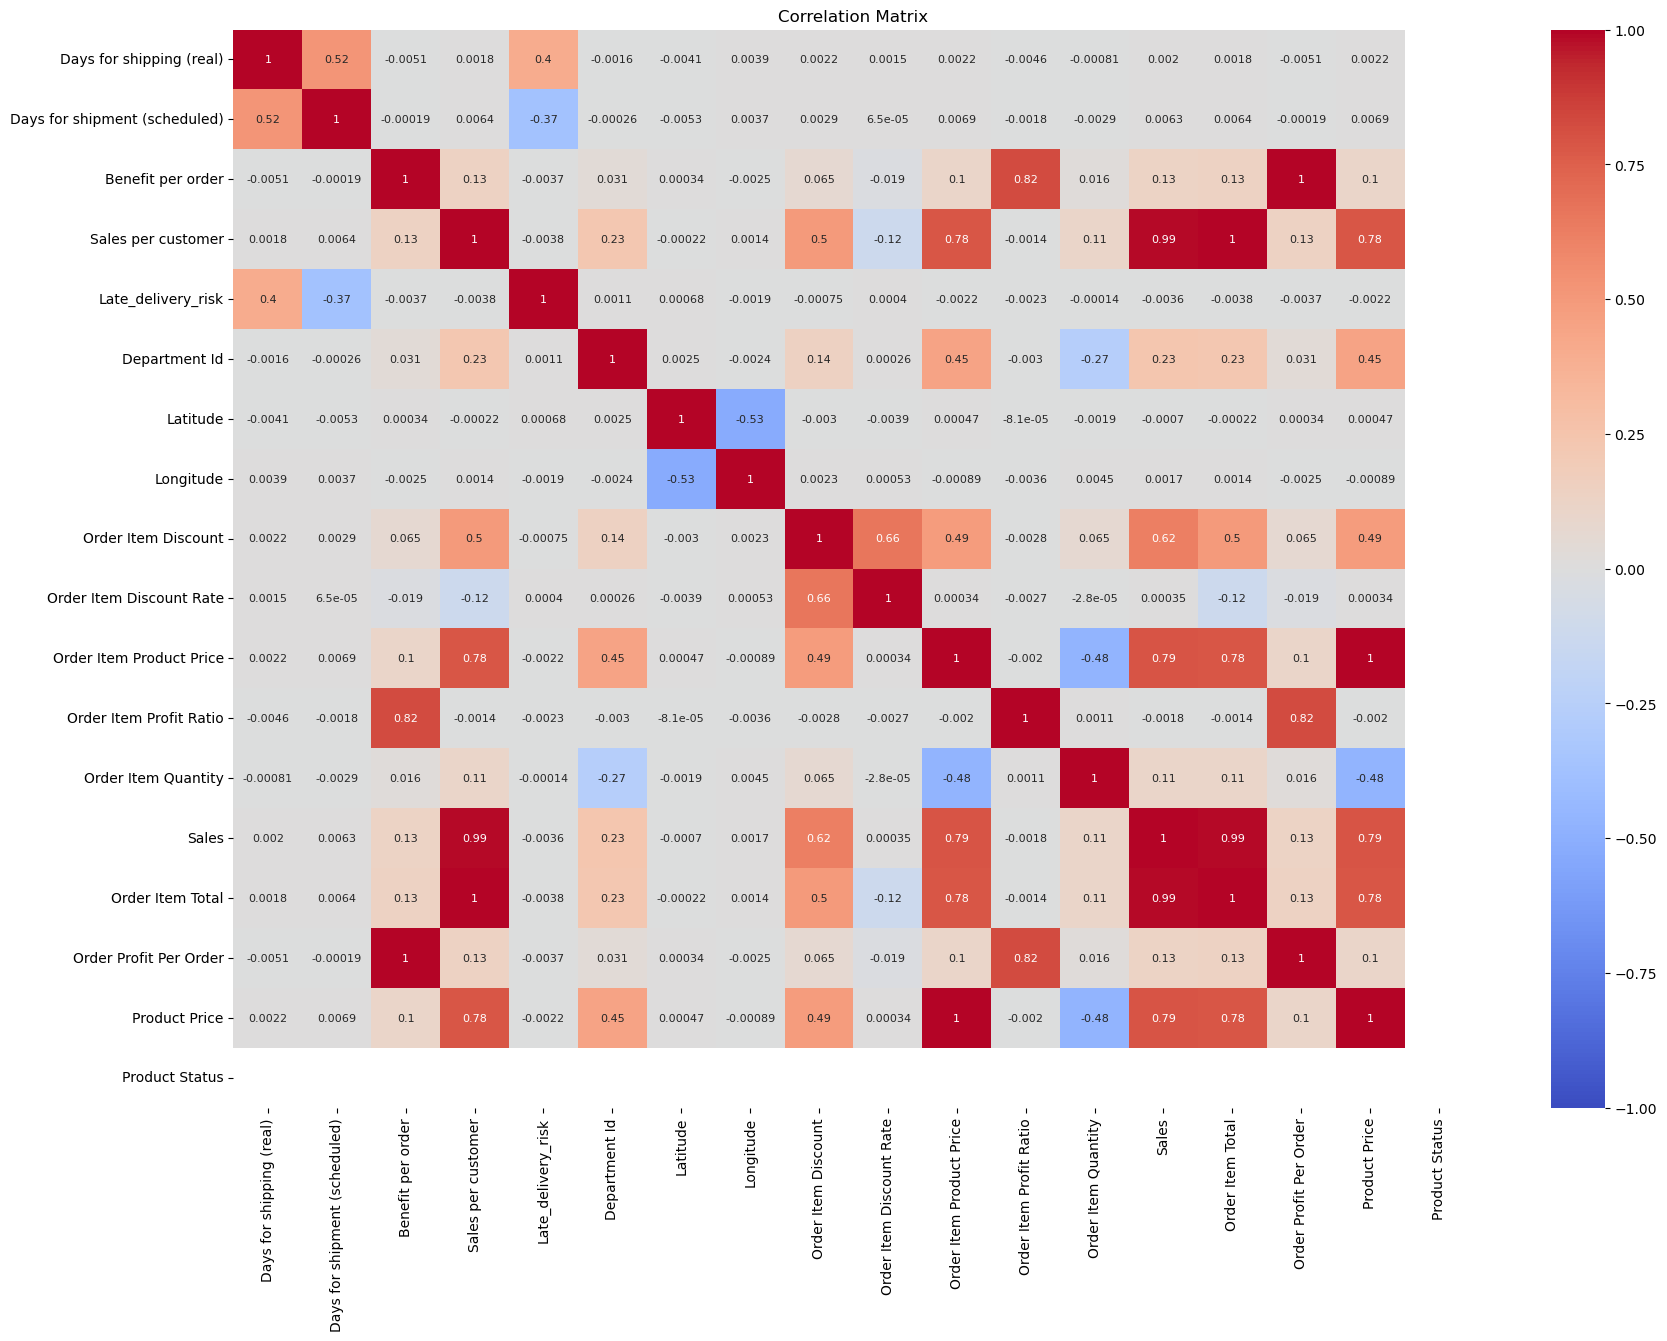

In [50]:
df_numeric = df.select_dtypes(include='number')

corr_matrix = df_numeric.corr()

plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()


In [51]:

threshold = 0.75

# Extract pairs of features with correlation greater than threshold
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

print("Pairs of features with correlation > 0.75:")
for pair in high_corr_pairs:
    print(pair)

Pairs of features with correlation > 0.75:
('Benefit per order', 'Order Item Profit Ratio')
('Benefit per order', 'Order Profit Per Order')
('Sales per customer', 'Order Item Product Price')
('Sales per customer', 'Sales')
('Sales per customer', 'Order Item Total')
('Sales per customer', 'Product Price')
('Order Item Product Price', 'Sales')
('Order Item Product Price', 'Order Item Total')
('Order Item Product Price', 'Product Price')
('Order Item Profit Ratio', 'Order Profit Per Order')
('Sales', 'Order Item Total')
('Sales', 'Product Price')
('Order Item Total', 'Product Price')


In [118]:
df.drop(["Benefit per order","Sales per customer","Order Item Cardprod Id","Order Item Product Price","Product Category Id","Order Customer Id"],axis=1,inplace=True)

In [119]:
df.drop("Product Status",axis=1,inplace=True)

# variance inflation factor

In [130]:
vif=pd.DataFrame()
vif["columns"]=['Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order','Product Price']
vif["vif value"] = [variance_inflation_factor(df[['Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order','Product Price']].values, i) for i in range(len(vif["columns"]))]
vif.T

,0,1,2,3,4,5,6,7
columns,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
vif value,389415821.949077,6.126471,3.410618,12.809224,25472272275.347256,20690128715.483124,3.413,24.873511


In [128]:
numeric_data=df.select_dtypes(include='number')

In [131]:
from statsmodels.tools.tools import add_constant

# Assuming df is your DataFrame containing the data

# Add a constant column to the DataFrame (required for VIF calculation)
df_with_const = add_constant(numeric_data)

# Initialize a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Filter out VIF values greater than 5
high_vif_features = vif_data[vif_data["VIF"] > 5]

print("Features with VIF greater than 5:")
print(high_vif_features)

MissingDataError: exog contains inf or nans

several of columns have vif values above 5 and some of them are very high. Such high value usually indicate that value in one column can be derived from values in other columns. Lets look at the data and see if we can find the relation.

In [57]:
df[['Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order','Product Price']].head(5)

,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
0,13.110000,0.04,0.29,1,327.75,314.640015,91.250000,327.75
1,16.389999,0.05,-0.80,1,327.75,311.359985,-249.089996,327.75
2,18.030001,0.06,-0.80,1,327.75,309.720001,-247.779999,327.75
3,22.940001,0.07,0.08,1,327.75,304.809998,22.860001,327.75
4,29.500000,0.09,0.45,1,327.75,298.250000,134.210007,327.75


In [132]:
df.drop(["Order Item Total","Product Price","Order Item Discount Rate"],axis=1,inplace=True)

In [59]:
vif=pd.DataFrame()
vif["columns"]=['Sales',
                'Order Item Quantity','Order Item Discount','Order Item Profit Ratio']
vif["data"] = [variance_inflation_factor(df[['Sales',
                'Order Item Quantity','Order Item Discount','Order Item Profit Ratio']].values, i) for i in range(len(vif["columns"]))]
vif

,columns,data
0,Sales,4.200158
1,Order Item Quantity,2.124456
2,Order Item Discount,3.068174
3,Order Item Profit Ratio,1.052867


# INVENTORY OPTIMIZATION

The economic order quantity (EOQ) refers to the ideal order quantity a company should purchase in order to minimize its inventory costs, such as holding costs, shortage costs, and order costs.

Reorder Point Analysis: (Daily average sales * average lead time) + safety stock

The reorder point and Economic Order Quantity (EOQ) are interrelated in inventory management in the following ways:

Reorder point: Determines when to place an order based on demand and delivery time.
EOQ: Calculates the optimal reorder quantity to minimise total inventory costs, taking into account ordering costs and inventory holding costs.

In [60]:
data = df[['Product Name', 'Sales', 'Days for shipping (real)', 'order date (DateOrders)']].copy()

grouped_data = data.groupby('Product Name').agg({
    'Sales': 'sum',
    'Days for shipping (real)': 'mean',
    'order date (DateOrders)': 'count'  # Use count of order dates as number of days
})

grouped_data['DemandRate'] = grouped_data['Sales'] / grouped_data['order date (DateOrders)']

grouped_data['LeadTime'] = grouped_data['Days for shipping (real)']

data['Date'] = pd.to_datetime(data['order date (DateOrders)'])
data['DailySales'] = data.groupby(['Product Name', data['Date'].dt.date])['Sales'].transform('sum')
std_dev_demand = data.groupby('Product Name')['DailySales'].std()
grouped_data['StdDevDemand'] = std_dev_demand

# Desired service level factor (Z) for a given service level (e.g., 95% service level)
# Typically, Z = 1.96 for 95% service level
Z = 1.96

grouped_data['SafetyStock'] = Z * grouped_data['StdDevDemand'] * np.sqrt(grouped_data['LeadTime'])
grouped_data['ReorderPoint'] = grouped_data['LeadTime'] * grouped_data['DemandRate'] + grouped_data['SafetyStock']
grouped_data[['DemandRate', 'LeadTime', 'StdDevDemand', 'SafetyStock', 'ReorderPoint']]

,DemandRate,LeadTime,StdDevDemand,SafetyStock,ReorderPoint
Product Name,,,,,
Adult dog supplies,84.400002,3.388211,1068.254717,3854.039301,4140.004347
Baby sweater,59.080002,3.149758,997.133404,3468.550020,3654.637755
Bag Boy Beverage Holder,75.686558,3.602151,67.576440,251.380920,524.015297
Bag Boy M330 Push Cart,241.129274,3.391304,152.526816,550.535919,1368.278675
Bowflex SelectTech 1090 Dumbbells,599.989990,3.500000,309.833499,1136.104983,3236.069949
...,...,...,...,...,...
adidas Kids' F5 Messi FG Soccer Cleat,104.302254,3.461832,76.446820,278.784418,639.861304
adidas Men's F10 Messi TRX FG Soccer Cleat,184.690530,3.511475,157.811959,579.616577,1228.152832
adidas Men's Germany Black Crest Away Tee,74.307958,3.692042,69.618091,262.187190,536.535258


In [61]:
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Item Discount              0
Order Item Id                    0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Profit Per Ord

In [ ]:
grouped_df = df[df['Customer Country'] == 'EE. UU.'].groupby(['Order Id','Product Name']).size().unstack().fillna(0).reset_index().set_index('Order Id')
grouped_df.head()
grouped_df.head()

In [ ]:
df['Customer Country'].value_counts()

In [ ]:
def custom_encoding(x):
    try:
        x = float(x)  # Convert x to float (or appropriate numeric type)
        if x <= 0:
            return 0
        if x >= 1:
            return 1
        # Handle other cases if needed
        return x  # Return x unchanged if it falls within desired range
    except ValueError:
        # Handle cases where x cannot be converted to float
        return None  # or return a default value, depending on your needs

# Apply custom encoding to DataFrame
try:
    grouped_df = grouped_df.applymap(custom_encoding)
except Exception as e:
    print(f"Error applying custom encoding: {e}")


In [ ]:
grouped_df = grouped_df.applymap(custom_encoding)

In [ ]:
grouped_df

In [ ]:
frequent_itemsets = apriori(grouped_df,min_support = 0.05, use_colnames = True)

In [ ]:
frequent_itemsets

In [ ]:
rules = association_rules(frequent_itemsets,metric = 'confidence',min_threshold = 0.3)
rules

In [ ]:
rules = association_rules(frequent_itemsets,metric = 'confidence',min_threshold = 0.3)

In [ ]:
rules

Key Products to Promote Together:

Perfect Fitness Perfect Rip Deck is frequently bought with several different products, indicating it pairs well with various items.
Recommendation: Create bundles or promotional offers featuring the Perfect Fitness Perfect Rip Deck with other popular items like Nike Men's CJ Elite 2 TD Football Cleat, Nike Men's Dri-FIT Victory Golf Polo, and O'Brien Men's Neoprene Life Vest.
Cross-Selling Opportunities:

Diamondback Women's Serene Classic Comfort Bike and Field & Stream Sportsman 16 Gun Fire Safe both pair well with Nike Men's CJ Elite 2 TD Football Cleat and Perfect Fitness Perfect Rip Deck.
Recommendation: Suggest these items as complementary products during the checkout process or in targeted marketing campaigns.
High Confidence and Lift:

The rule with the highest lift (1.083) involves O'Brien Men's Neoprene Life Vest and Perfect Fitness Perfect Rip Deck.
Recommendation: Highlight these pairs in advertising and suggest them together to customers who show interest in either product.
General Strategy:

Marketing & Promotions: Use these insights to design marketing campaigns that highlight these frequently purchased together items. This can include email marketing, personalized recommendations on the website, and special discount bundles.

Inventory Management: Ensure that these frequently associated items are stocked together to facilitate easy picking and packing, improving warehouse efficiency.

In [64]:
grouped_df = df[df['Order Country'] == 'Estados Unidos'].groupby(['Order Id','Product Name']).size().unstack().fillna(0).reset_index().set_index('Order Id')
grouped_df.head()
grouped_df

Product Name,Bag Boy Beverage Holder,Bridgestone e6 Straight Distance NFL Carolina,Bridgestone e6 Straight Distance NFL San Dieg,Bridgestone e6 Straight Distance NFL Tennesse,Clicgear 8.0 Shoe Brush,Clicgear Rovic Cooler Bag,Columbia Men's PFG Anchor Tough T-Shirt,Diamondback Women's Serene Classic Comfort Bi,ENO Atlas Hammock Straps,Field & Stream Sportsman 16 Gun Fire Safe,...,Under Armour Kids' Mercenary Slide,Under Armour Men's Compression EV SL Slide,Under Armour Men's Tech II T-Shirt,Under Armour Women's Ignite PIP VI Slide,Under Armour Women's Ignite Slide,Under Armour Women's Micro G Skulpt Running S,adidas Kids' F5 Messi FG Soccer Cleat,adidas Men's F10 Messi TRX FG Soccer Cleat,adidas Men's Germany Black Crest Away Tee,adidas Youth Germany Black/Red Away Match Soc
Order Id,,,,,,,,,,,,,,,,,,,,,
31297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31301,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41287,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
def custom_encoding(x):
    try:
        x = float(x)  # Convert x to float (or appropriate numeric type)
        if x <= 0:
            return 0
        if x >= 1:
            return 1
        # Handle other cases if needed
        return x  # Return x unchanged if it falls within desired range
    except ValueError:
        # Handle cases where x cannot be converted to float
        return None  # or return a default value, depending on your needs

# Apply custom encoding to DataFrame
try:
    grouped_df = grouped_df.applymap(custom_encoding)
except Exception as e:
    print(f"Error applying custom encoding: {e}")


In [66]:
grouped_df = grouped_df.applymap(custom_encoding)

In [67]:
frequent_itemsets = apriori(grouped_df,min_support = 0.05, use_colnames = True)

C:\Users\DELL\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [73]:
rules = association_rules(frequent_itemsets,metric = 'confidence',min_threshold = 0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Diamondback Women's Serene Classic Comfort Bi),(Nike Men's CJ Elite 2 TD Football Cleat),0.214027,0.336034,0.067715,0.316384,0.941525,-0.004206,0.971256,-0.073232
1,(Diamondback Women's Serene Classic Comfort Bi),(Perfect Fitness Perfect Rip Deck),0.214027,0.357799,0.071947,0.336158,0.939516,-0.004632,0.967400,-0.075707
2,(Field & Stream Sportsman 16 Gun Fire Safe),(Nike Men's CJ Elite 2 TD Football Cleat),0.262636,0.336034,0.081137,0.308932,0.919347,-0.007118,0.960782,-0.106325
3,(Field & Stream Sportsman 16 Gun Fire Safe),(Perfect Fitness Perfect Rip Deck),0.262636,0.357799,0.088271,0.336096,0.939342,-0.005700,0.967309,-0.080524
4,(Nike Men's Dri-FIT Victory Golf Polo),(Nike Men's CJ Elite 2 TD Football Cleat),0.317291,0.336034,0.098428,0.310213,0.923161,-0.008193,0.962567,-0.108669
5,(Nike Men's Free 5.0+ Running Shoe),(Nike Men's CJ Elite 2 TD Football Cleat),0.183434,0.336034,0.055623,0.303230,0.902379,-0.006017,0.952920,-0.116985
6,(O'Brien Men's Neoprene Life Vest),(Nike Men's CJ Elite 2 TD Football Cleat),0.284522,0.336034,0.088150,0.309817,0.921982,-0.007459,0.962015,-0.105762
7,(Pelican Sunstream 100 Kayak),(Nike Men's CJ Elite 2 TD Football Cleat),0.238573,0.336034,0.072430,0.303599,0.903476,-0.007738,0.953424,-0.123046
8,(Nike Men's CJ Elite 2 TD Football Cleat),(Perfect Fitness Perfect Rip Deck),0.336034,0.357799,0.109432,0.325657,0.910166,-0.010801,0.952335,-0.129415
9,(Perfect Fitness Perfect Rip Deck),(Nike Men's CJ Elite 2 TD Football Cleat),0.357799,0.336034,0.109432,0.305847,0.910166,-0.010801,0.956512,-0.133217


In [62]:
df['Order Country'].value_counts()

Order Country
Estados Unidos       24840
Francia              13222
Mxico                13172
Alemania              9564
Australia             8497
                     ...  
Guinea Ecuatorial        2
Kuwait                   2
Shara Occidental         2
Burundi                  1
Serbia                   1
Name: count, Length: 164, dtype: int64

# RFM ANALYSIS

In [105]:
from datetime import datetime, timedelta

In [106]:
import datetime

# Reference date (today's date for the analysis)
reference_date = datetime.datetime.now()

# Aggregate data by CustomerID
rfm_data = df.groupby('Customer Id').agg({
    'order date (DateOrders)': lambda x: (reference_date - x.max()).days,
    'Customer Id': 'count',
    'Sales': 'sum'
}).rename(columns={
    'order date (DateOrders)': 'Recency',
    'Customer Id': 'Frequency',
    'Sales': 'Monetary'
})

rfm_data

,Recency,Frequency,Monetary
Customer Id,,,
1,3145,1,499.950012
10,2661,8,1264.790012
100,2540,19,4104.570091
1000,2565,18,3368.460066
10000,2474,4,659.870007
...,...,...,...
9995,2667,19,3723.490028
9996,2639,15,2699.520023
9997,2696,5,789.910023


In [ ]:
df.columns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df

In [107]:
# Define RFM score functions
def r_score(x, quantiles):
    if x <= quantiles[0.2]:
        return 5
    elif x <= quantiles[0.4]:
        return 4
    elif x <= quantiles[0.6]:
        return 3
    elif x <= quantiles[0.8]:
        return 2
    else:
        return 1

def fm_score(x, quantiles):
    if x <= quantiles[0.2]:
        return 1
    elif x <= quantiles[0.4]:
        return 2
    elif x <= quantiles[0.6]:
        return 3
    elif x <= quantiles[0.8]:
        return 4
    else:
        return 5

# Calculate quantiles
recency_quantiles = rfm_data['Recency'].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
frequency_quantiles = rfm_data['Frequency'].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
monetary_quantiles = rfm_data['Monetary'].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()

# Apply RFM scoring
rfm_data['R'] = rfm_data['Recency'].apply(r_score, args=(recency_quantiles,))
rfm_data['F'] = rfm_data['Frequency'].apply(fm_score, args=(frequency_quantiles,))
rfm_data['M'] = rfm_data['Monetary'].apply(fm_score, args=(monetary_quantiles,))

# Calculate RFM Score
rfm_data['RFM_Score'] = rfm_data['R'].map(str) + rfm_data['F'].map(str) + rfm_data['M'].map(str)

rfm_data.head()


,Recency,Frequency,Monetary,R,F,M,RFM_Score
Customer Id,,,,,,,
1,3145,1,499.950012,1,1,2,112
10,2661,8,1264.790012,2,3,3,233
100,2540,19,4104.570091,3,5,5,355
1000,2565,18,3368.460066,2,5,5,255
10000,2474,4,659.870007,4,3,3,433


In [108]:
# Define segments based on RFM scores
def segment_customers(df):
    if df['RFM_Score'] == '555':
        return 'Champions'
    elif df['RFM_Score'][0] == '5':
        return 'Loyal Customers'
    elif df['RFM_Score'][1] == '5':
        return 'Potential Loyalists'
    elif df['RFM_Score'][2] == '5':
        return 'Big Spenders'
    elif df['RFM_Score'][0] == '1':
        return 'At Risk'
    else:
        return 'Others'

# Apply segmentation
rfm_data['Segment'] = rfm_data.apply(segment_customers, axis=1)

rfm_data


,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
Customer Id,,,,,,,,
1,3145,1,499.950012,1,1,2,112,At Risk
10,2661,8,1264.790012,2,3,3,233,Others
100,2540,19,4104.570091,3,5,5,355,Potential Loyalists
1000,2565,18,3368.460066,2,5,5,255,Potential Loyalists
10000,2474,4,659.870007,4,3,3,433,Others
...,...,...,...,...,...,...,...,...
9995,2667,19,3723.490028,2,5,5,255,Potential Loyalists
9996,2639,15,2699.520023,2,4,4,244,Others
9997,2696,5,789.910023,2,3,3,233,Others


In [135]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name',
       'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Id', 'Order Item Discount',
       'Order Item Id', 'Order Item Profit Ratio', 'Order Item Quantity',
       'Sales', 'Order Profit Per Order', 'Order Region', 'Order State',
       'Order Status', 'Product Card Id', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')